In [1]:
%matplotlib notebook
import pandas as pd
import pathlib as path
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import hvplot.pandas
import datetime as dt
import seaborn as sns
from config import api_key
from pprint import pprint
from sklearn.linear_model import LinearRegression

In [2]:
# import data for Dollarama, Canadian_tire, and Linamar companies.

Dollarama_balance_sheet=pd.read_csv("Resource/Dollarama_balance_sheet.csv")
Dollarama_income_statement = pd.read_csv("Resource/Dollarama_income_tatement.csv")
Dollarama_cash_flow_statement = pd.read_csv("Resource/Dollarama_cash_flow_statement.csv")

Canadian_tire_balance_sheet = pd.read_csv("Resource/Canadian_tire_balance_sheet.csv")
Canadian_tire_income_statement = pd.read_csv("Resource/Canadian_tire_income_statement.csv")
Canadian_tire_cash_flow_statement = pd.read_csv("Resource/Canadian_tire_cash_flow_statement.csv")

Linamar_balance_sheet = pd.read_csv("Resource/Linamar_balance_sheet.csv")
Linamar_income_statement = pd.read_csv("Resource/Linamar_income_statement.csv")
Linamar_cash_flow_statement = pd.read_csv("Resource/Linamar_cash_flow_statement.csv")


In [3]:
#Dollarama_balance_sheet.head(10)
#Dollarama_income_statement.head(10)
#Dollarama_cash_flow_statement.head(10)

#Canadian_tire_balance_sheet.head(10)
#Canadian_tire_income_statement.head(10)
#Canadian_tire_cash_flow_statement.head(10)

#Linamar_balance_sheet.head(10)
#Linamar_income_statement.head(10)
Linamar_cash_flow_statement.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Linamar Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Premium Export,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cash Flow Statement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,FY-9,FY-8,FY-7,FY-6,FY-5,FY-4,FY-3,FY-2,FY-1,FY
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Period End Date,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Rename the columns.
Dollarama_balance_sheet=Dollarama_balance_sheet.rename(columns=        
         { "Unnamed: 0": "Dollarama",
          'Unnamed: 1':'2014',
          'Unnamed: 2':'2015',
          'Unnamed: 3':'2016', 
          'Unnamed: 4':'2017',
          'Unnamed: 5':"2018", 
          'Unnamed: 6':'2019',
          'Unnamed: 7':'2020', 
          'Unnamed: 8':'2021',
          'Unnamed: 9':'2022',
          'Unnamed: 10': '2023'})

Dollarama_income_statement = Dollarama_income_statement.rename(columns=        
         { "Unnamed: 0": "Dollarama",
          'Unnamed: 1':'2014',
          'Unnamed: 2':'2015',
          'Unnamed: 3':'2016', 
          'Unnamed: 4':'2017',
          'Unnamed: 5':"2018", 
          'Unnamed: 6':'2019',
          'Unnamed: 7':'2020', 
          'Unnamed: 8':'2021',
          'Unnamed: 9':'2022',
          'Unnamed: 10': '2023'})

Dollarama_cash_flow_statement = Dollarama_cash_flow_statement.rename(columns=        
         { "Unnamed: 0": "Dollarama",
          'Unnamed: 1':'2014',
          'Unnamed: 2':'2015',
          'Unnamed: 3':'2016', 
          'Unnamed: 4':'2017',
          'Unnamed: 5':"2018", 
          'Unnamed: 6':'2019',
          'Unnamed: 7':'2020', 
          'Unnamed: 8':'2021',
          'Unnamed: 9':'2022',
          'Unnamed: 10': '2023'})


Canadian_tire_balance_sheet = Canadian_tire_balance_sheet.rename(columns=        
         { "Canadian Tire Corporation Limited": "Canadian Tire",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Canadian_tire_income_statement = Canadian_tire_income_statement.rename(columns=        
         { "Unnamed: 0": "Canadian Tire",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Canadian_tire_cash_flow_statement = Canadian_tire_cash_flow_statement.rename(columns=        
         { "Unnamed: 0": "Canadian Tire",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Linamar_balance_sheet = Linamar_balance_sheet.rename(columns=        
         { "Unnamed: 0": "Linamar",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Linamar_income_statement = Linamar_income_statement.rename(columns=        
         { "Unnamed: 0": "Linamar",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

Linamar_cash_flow_statement = Linamar_cash_flow_statement.rename(columns=        
         { "Unnamed: 0": "Linamar",
          'Unnamed: 1':'2013',
          'Unnamed: 2':'2014',
          'Unnamed: 3':'2015', 
          'Unnamed: 4':'2016',
          'Unnamed: 5':"2017", 
          'Unnamed: 6':'2018',
          'Unnamed: 7':'2019', 
          'Unnamed: 8':'2020',
          'Unnamed: 9':'2021',
          'Unnamed: 10': '2022'})

In [5]:
# For test
#Dollarama_balance_sheet.head(10)
#Dollarama_income_statement.head(10)
#Dollarama_cash_flow_statement.head(10)

#Canadian_tire_balance_sheet.head(10)
#Canadian_tire_income_statement.head(10)
#Canadian_tire_cash_flow_statement.head(10)

#Linamar_balance_sheet.head(10)
#Linamar_income_statement.head(10)
Linamar_cash_flow_statement.head(10)

,Linamar,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Linamar Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Premium Export,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cash Flow Statement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,FY-9,FY-8,FY-7,FY-6,FY-5,FY-4,FY-3,FY-2,FY-1,FY
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Period End Date,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Clean data for Dollarama
Dollarama_balance_sheet = Dollarama_balance_sheet.loc[Dollarama_balance_sheet["Dollarama"] != 'Period End Date']
Dollarama_balance_sheet = Dollarama_balance_sheet.dropna(how='any')
Dollarama_balance_sheet = Dollarama_balance_sheet.set_index("Dollarama")


Dollarama_income_statement = Dollarama_income_statement.loc[Dollarama_income_statement["Dollarama"] != 'Period End Date']
Dollarama_income_statement = Dollarama_income_statement.dropna(how='any')
Dollarama_income_statement = Dollarama_income_statement.set_index("Dollarama")


Dollarama_cash_flow_statement = Dollarama_cash_flow_statement.loc[Dollarama_cash_flow_statement["Dollarama"] != 'Period End Date']
Dollarama_cash_flow_statement = Dollarama_cash_flow_statement.dropna(how='any')
Dollarama_cash_flow_statement = Dollarama_cash_flow_statement.set_index("Dollarama")


# Clean data for Canadian_tire
Canadian_tire_balance_sheet = Canadian_tire_balance_sheet.loc[Canadian_tire_balance_sheet["Canadian Tire"] != 'Period End Date']
Canadian_tire_balance_sheet = Canadian_tire_balance_sheet.dropna(how='any')
Canadian_tire_balance_sheet = Canadian_tire_balance_sheet.set_index("Canadian Tire")


Canadian_tire_income_statement = Canadian_tire_income_statement.loc[Canadian_tire_income_statement["Canadian Tire"] != 'Period End Date']
Canadian_tire_income_statement = Canadian_tire_income_statement.dropna(how='any')
Canadian_tire_income_statement = Canadian_tire_income_statement.set_index("Canadian Tire")



Canadian_tire_cash_flow_statement = Canadian_tire_cash_flow_statement.loc[Canadian_tire_cash_flow_statement["Canadian Tire"] != 'Period End Date']
Canadian_tire_cash_flow_statement = Canadian_tire_cash_flow_statement.dropna(how='any')
Canadian_tire_cash_flow_statement = Canadian_tire_cash_flow_statement.set_index("Canadian Tire")



# Clean data for Canadian_tire
Linamar_balance_sheet = Linamar_balance_sheet.loc[Linamar_balance_sheet["Linamar"] != 'Period End Date']
Linamar_balance_sheet = Linamar_balance_sheet.dropna(how='any')
Linamar_balance_sheet = Linamar_balance_sheet.set_index("Linamar")


Linamar_income_statement = Linamar_income_statement.loc[Linamar_income_statement["Linamar"] != 'Period End Date']
Linamar_income_statement = Linamar_income_statement.dropna(how='any')
Linamar_income_statement = Linamar_income_statement.set_index("Linamar")


Linamar_cash_flow_statement = Linamar_cash_flow_statement.loc[Linamar_cash_flow_statement["Linamar"] != 'Period End Date']
Linamar_cash_flow_statement = Linamar_cash_flow_statement.dropna(how='any')
Linamar_cash_flow_statement = Linamar_cash_flow_statement.set_index("Linamar")


In [7]:
Dollarama_balance_sheet.columns

Index(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [8]:
# Transposing Columns into Rows
Dollarama_balance_sheet_df = Dollarama_balance_sheet.transpose()
Dollarama_income_statement_df = Dollarama_income_statement.transpose()
Dollarama_cash_flow_statement_df = Dollarama_cash_flow_statement.transpose()
Canadian_tire_balance_sheet_df = Canadian_tire_balance_sheet.transpose()
Canadian_tire_income_statement_df = Canadian_tire_income_statement.transpose()
Canadian_tire_cash_flow_statement_df = Canadian_tire_cash_flow_statement.transpose()
Linamar_balance_sheet_df = Linamar_balance_sheet.transpose()
Linamar_income_statement_df = Linamar_income_statement.transpose()
Linamar_cash_flow_statement_df = Linamar_cash_flow_statement.transpose()


In [9]:
def convert_to_float(value):
    try:
        # Replace non-numeric characters and convert to float
        return float(value.replace('%', '').replace(',', ''))
    except ValueError:
        # Handle errors, e.g., if the value is already numeric or contains unexpected characters
        return value
# Apply the conversion function to the entire DataFrame
Dollarama_balance_sheet_df = Dollarama_balance_sheet_df.applymap(convert_to_float)
Dollarama_income_statement_df = Dollarama_income_statement_df.applymap(convert_to_float)
Dollarama_cash_flow_statement_df = Dollarama_cash_flow_statement_df.applymap(convert_to_float)
Canadian_tire_balance_sheet_df = Canadian_tire_balance_sheet_df.applymap(convert_to_float)
Canadian_tire_income_statement_df = Canadian_tire_income_statement_df.applymap(convert_to_float)
Canadian_tire_cash_flow_statement_df = Canadian_tire_cash_flow_statement_df.applymap(convert_to_float)
Linamar_balance_sheet_df = Linamar_balance_sheet_df.applymap(convert_to_float)
Linamar_income_statement_df = Linamar_income_statement_df.applymap(convert_to_float)
Linamar_cash_flow_statement_df = Linamar_cash_flow_statement_df.applymap(convert_to_float)

# Risk Analysis Ratio

In [10]:
columns = ["Ticker", "Debt to equity ratio", "Cash flow to debt ratio",
          "Interest coverage ratio"]
Dollarama_ratios_df = pd.DataFrame(columns=columns)

Canadian_tire_ratios_df = pd.DataFrame(columns=columns)

Linamar_ratios_df = pd.DataFrame(columns=columns)

## Dollarama

In [11]:
#Debt to equity ratio = Total liabilities / Shareholder’s equity
Dollarama_ratios_df["Debt to equity ratio"] = Dollarama_balance_sheet_df["Total Current Liabilities"] / Dollarama_balance_sheet_df["Total Equity"]

#Cash flow to debt ratio: (Operating Cash Flow / Total Debt) * 100
Dollarama_ratios_df["Cash flow to debt ratio"] = (Dollarama_cash_flow_statement_df["Cash from Operations"] / Dollarama_balance_sheet_df["Total Liabilities"])*100

#Interest coverage ratio: Operating income / Interest expenses
Dollarama_ratios_df["Interest coverage ratio"] = -(Dollarama_income_statement_df["Operating Income"] / Dollarama_income_statement_df["Net Interest Expenses"])

In [12]:
Dollarama_ratios_df["Ticker"] = "Dollarama"
Dollarama_ratios_df = Dollarama_ratios_df.drop(Dollarama_ratios_df.index[9]).reset_index(drop=False)
Dollarama_ratios_df

,index,Ticker,Debt to equity ratio,Cash flow to debt ratio,Interest coverage ratio
0,2014,Dollarama,0.189546,43.890102,30.369571
1,2015,Dollarama,0.291017,37.056181,21.174634
2,2016,Dollarama,0.486291,33.350383,25.677728
3,2017,Dollarama,5.119481,28.651171,19.511834
4,2018,Dollarama,-2.856834,29.145968,18.947313
5,2019,Dollarama,-1.396523,18.654994,8.934628
6,2020,Dollarama,-11.849581,19.232736,8.657343
7,2021,Dollarama,3.945496,22.850262,287.327722
8,2022,Dollarama,-13.809416,28.070978,386.751727


## Canadian Tire

In [13]:
#Debt to equity ratio = Total liabilities / Shareholder’s equity
Canadian_tire_ratios_df["Debt to equity ratio"] = Canadian_tire_balance_sheet_df["Total Current Liabilities"] / Canadian_tire_balance_sheet_df["Total Equity"]

#Cash flow to debt ratio: (Operating Cash Flow / Total Debt) * 100
Canadian_tire_ratios_df["Cash flow to debt ratio"] = (Canadian_tire_cash_flow_statement_df["Cash from Operations"] / Canadian_tire_balance_sheet_df["Total Liabilities"])*100

#Interest coverage ratio: Operating income / Interest expenses
Canadian_tire_ratios_df["Interest coverage ratio"] = -(Canadian_tire_income_statement_df["Operating Income"] / Canadian_tire_income_statement_df["Net Interest Expenses"])

In [14]:
Canadian_tire_ratios_df["Ticker"] = "Canadian Tire"
Canadian_tire_ratios_df = Canadian_tire_ratios_df.drop(Canadian_tire_ratios_df.index[0]).reset_index(drop=False)
Canadian_tire_ratios_df

,index,Ticker,Debt to equity ratio,Cash flow to debt ratio,Interest coverage ratio
0,2014,Canadian Tire,0.813170,6.438851,8.583765
1,2015,Canadian Tire,0.670812,10.642415,11.618240
2,2016,Canadian Tire,0.815872,10.312059,11.698413
3,2017,Canadian Tire,0.813801,9.669115,10.827739
4,2018,Canadian Tire,0.971043,6.800991,8.000000
5,2019,Canadian Tire,1.044816,7.761032,5.417102
6,2020,Canadian Tire,0.892214,16.797778,5.543023
7,2021,Canadian Tire,1.042883,11.352133,8.537201
8,2022,Canadian Tire,1.015314,3.757527,7.705334


## Linamar

In [15]:
#Debt to equity ratio = Total liabilities / Shareholder’s equity
Linamar_ratios_df["Debt to equity ratio"] = Linamar_balance_sheet_df["Total Current Liabilities"] / Linamar_balance_sheet_df["Total Equity"]

#Cash flow to debt ratio: (Operating Cash Flow / Total Debt) * 100
Linamar_ratios_df["Cash flow to debt ratio"] = (Linamar_cash_flow_statement_df["Cash from Operations"] / Linamar_balance_sheet_df["Total Liabilities"])*100

#Interest coverage ratio: Operating income / Interest expenses
Linamar_ratios_df["Interest coverage ratio"] = -(Linamar_income_statement_df["Operating Income"] / Linamar_income_statement_df["Net Interest Expenses"])

In [16]:
Linamar_ratios_df["Ticker"] = "Linamar"
Linamar_ratios_df = Linamar_ratios_df.drop(Linamar_ratios_df.index[0]).reset_index(drop=False)
Linamar_ratios_df

,index,Ticker,Debt to equity ratio,Cash flow to debt ratio,Interest coverage ratio
0,2014,Linamar,0.459813,42.773794,18.476876
1,2015,Linamar,0.410017,44.889722,23.235337
2,2016,Linamar,0.488866,34.057565,34.444196
3,2017,Linamar,0.416331,23.135680,250.300936
4,2018,Linamar,0.416093,15.962907,21.382423
5,2019,Linamar,0.339264,32.901209,15.270721
6,2020,Linamar,0.504702,44.770529,26.340734
7,2021,Linamar,0.379473,32.553588,-182.175627
8,2022,Linamar,0.448162,12.434815,60.769451


In [17]:
combined_df = pd.concat([Dollarama_ratios_df, Canadian_tire_ratios_df, Linamar_ratios_df])

# Filter data for the Debt to equity ratio between the three companies (Dollarama , Canadian Tire & Linamar)
filtered_df_debt_equity = combined_df[["Ticker", "index", "Debt to equity ratio"]]

# Filter data for the Cash flow to debt ratio between the three companies (Dollarama , Canadian Tire & Linamar)
filtered_df_cash_flow = combined_df[["Ticker", "index", "Cash flow to debt ratio"]]

# Filter data for the Interest coverage ratio between the three companies (Dollarama , Canadian Tire & Linamar)
filtered_df_interest_coverage = combined_df[["Ticker", "index", "Interest coverage ratio"]]

## Line plot to compare Debt to Equity Ratio


<IPython.core.display.Javascript object>


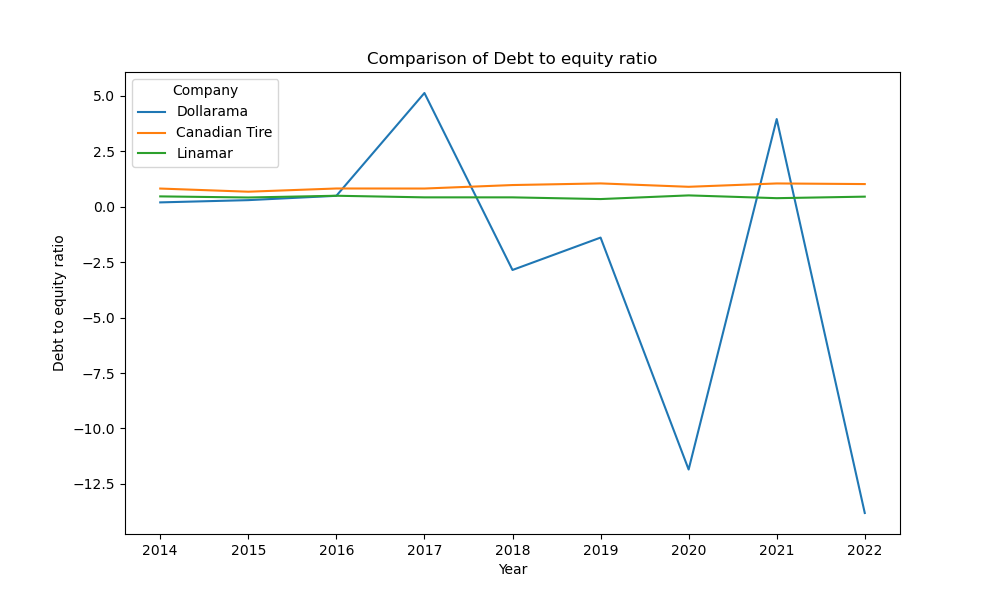

In [18]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='index', y='Debt to equity ratio', hue='Ticker', data=filtered_df_debt_equity)
plt.title('Comparison of Debt to equity ratio')
plt.xlabel('Year')
plt.ylabel('Debt to equity ratio')
plt.legend(title='Company', loc='best')
plt.show()

## Line plot to compare Cash Flow to Debt Ratio

<IPython.core.display.Javascript object>


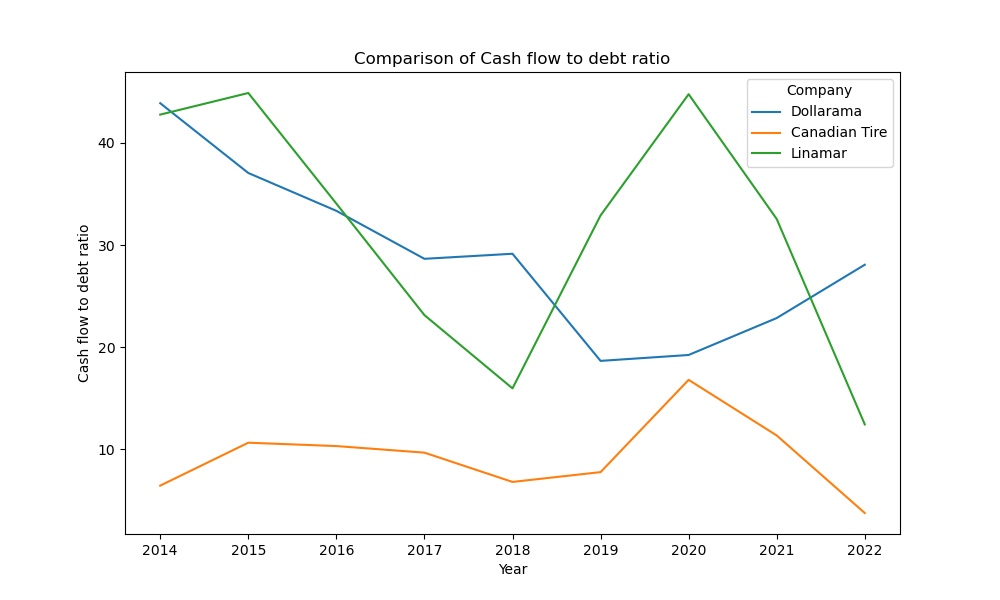

In [19]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='index', y='Cash flow to debt ratio', hue='Ticker', data=filtered_df_cash_flow)
plt.title('Comparison of Cash flow to debt ratio')
plt.xlabel('Year')
plt.ylabel('Cash flow to debt ratio')
plt.legend(title='Company', loc='best')
plt.show()

## Line plot to compare Interest Coverage Ratio

<IPython.core.display.Javascript object>


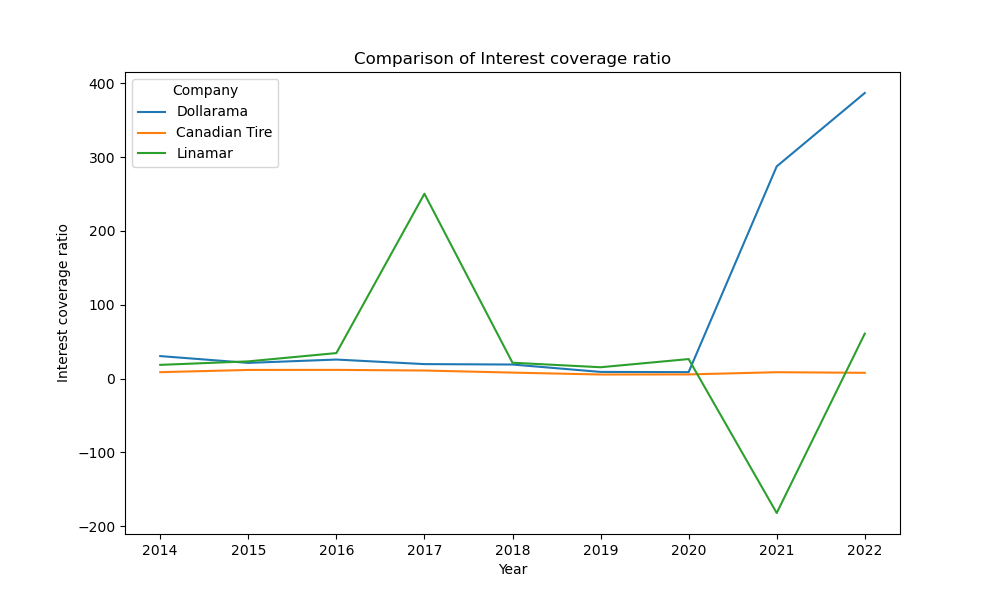

In [20]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='index', y='Interest coverage ratio', hue='Ticker', data=filtered_df_interest_coverage)
plt.title('Comparison of Interest coverage ratio')
plt.xlabel('Year')
plt.ylabel('Interest coverage ratio')
plt.legend(title='Company', loc='best')
plt.show()

In [21]:
# Convert 'index' column to numeric type
Dollarama_ratios_df['index'] = pd.to_numeric(Dollarama_ratios_df['index'], errors='coerce')
Canadian_tire_ratios_df['index'] = pd.to_numeric(Canadian_tire_ratios_df['index'], errors='coerce')
Linamar_ratios_df['index'] = pd.to_numeric(Linamar_ratios_df['index'], errors='coerce')

<IPython.core.display.Javascript object>


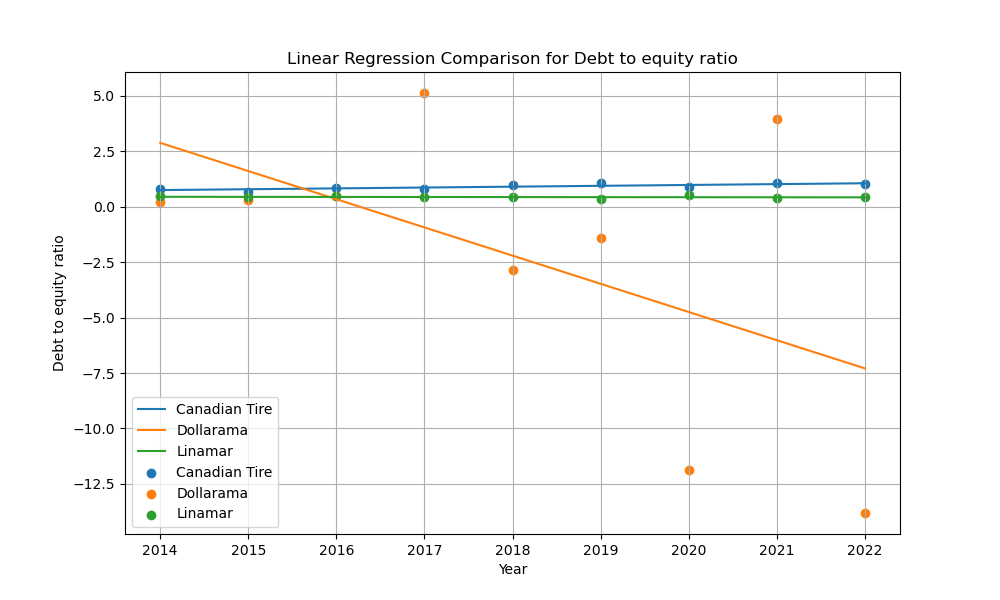

In [22]:
# Combine the data for 'Debt to equity ratio' and 'index' columns for all three companies
debt_equity_combined = pd.concat([Dollarama_ratios_df[['index', 'Debt to equity ratio']], 
                           Canadian_tire_ratios_df[['index', 'Debt to equity ratio']], 
                           Linamar_ratios_df[['index', 'Debt to equity ratio']]], 
                          keys=['Dollarama', 'Canadian Tire', 'Linamar'])  # Adding keys to differentiate companies

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each company and plot its linear regression line
for company, company_data in debt_equity_combined.groupby(level=0):
    X = company_data['index'].values.reshape(-1, 1)
    Y = company_data['Debt to equity ratio']
    
    model = LinearRegression()
    model.fit(X, Y)
    
    # Plot the regression line
    plt.plot(X, model.predict(X), label=company)

# Plot the actual data points for each company
for company, company_data in debt_equity_combined.groupby(level=0):
    plt.scatter(company_data['index'], company_data['Debt to equity ratio'], label=company, marker='o')

plt.xlabel('Year')
plt.ylabel('Debt to equity ratio')
plt.title('Linear Regression Comparison for Debt to equity ratio')
plt.legend()
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


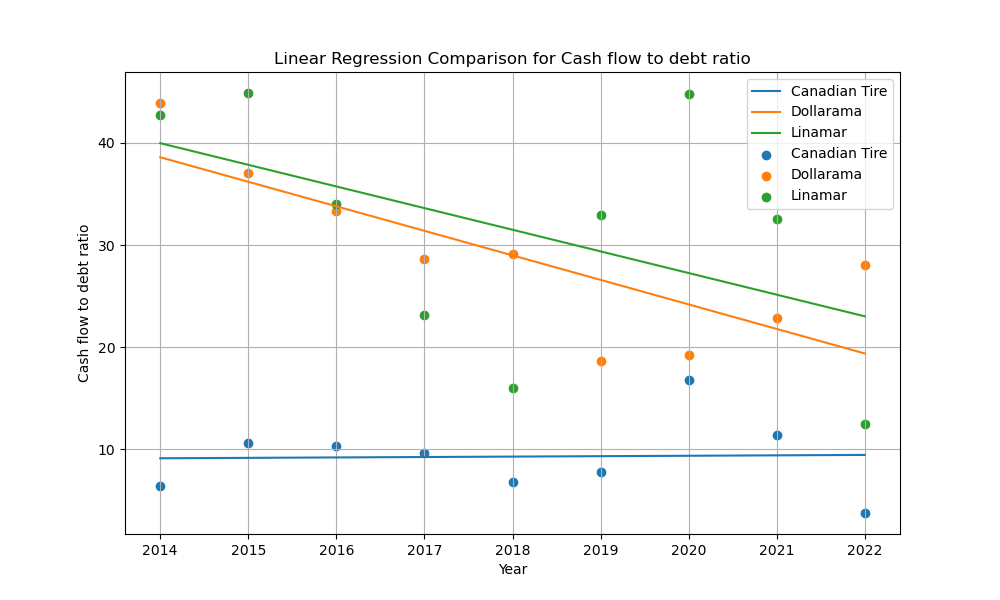

In [23]:
# Combine the data for 'Cash flow to debt ratio' and 'index' columns for all three companies
cash_flow_debt_combined = pd.concat([Dollarama_ratios_df[['index', 'Cash flow to debt ratio']], 
                           Canadian_tire_ratios_df[['index', 'Cash flow to debt ratio']], 
                           Linamar_ratios_df[['index', 'Cash flow to debt ratio']]], 
                          keys=['Dollarama', 'Canadian Tire', 'Linamar'])  # Adding keys to differentiate companies
cash_flow_debt_combined.dropna(subset=['Cash flow to debt ratio'], inplace=True)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each company and plot its linear regression line
for company, company_data in cash_flow_debt_combined.groupby(level=0):
    X = company_data['index'].values.reshape(-1, 1)
    Y = company_data['Cash flow to debt ratio']
    
    model = LinearRegression()
    model.fit(X, Y)
    
    # Plot the regression line
    plt.plot(X, model.predict(X), label=company)

# Plot the actual data points for each company
for company, company_data in cash_flow_debt_combined.groupby(level=0):
    plt.scatter(company_data['index'], company_data['Cash flow to debt ratio'], label=company, marker='o')

plt.xlabel('Year')
plt.ylabel('Cash flow to debt ratio')
plt.title('Linear Regression Comparison for Cash flow to debt ratio')
plt.legend()
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


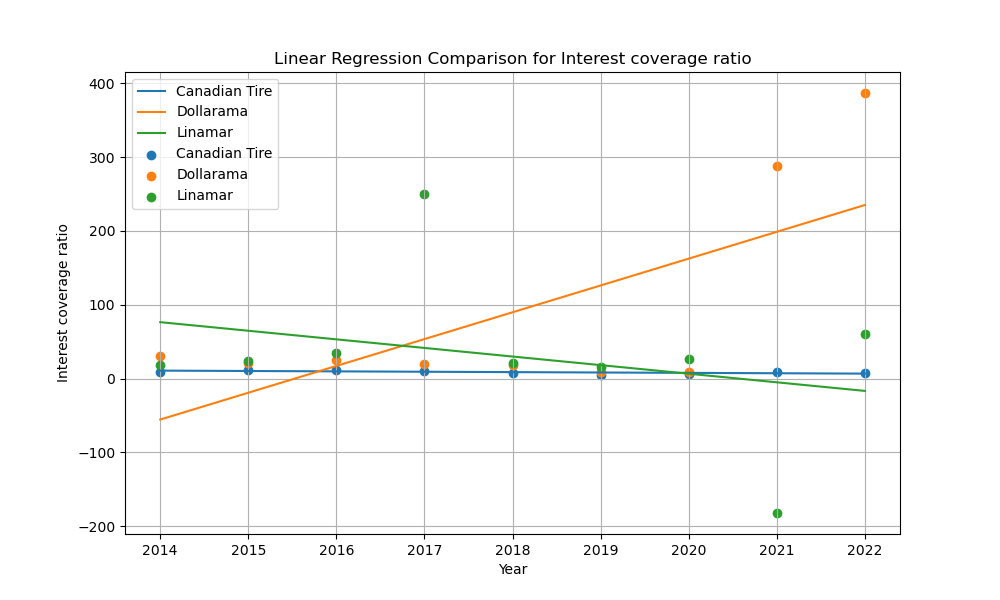

In [24]:
# Combine the data for 'Interest coverage ratio' and 'index' columns for all three companies
interest_coverage_combined = pd.concat([Dollarama_ratios_df[['index', 'Interest coverage ratio']], 
                           Canadian_tire_ratios_df[['index', 'Interest coverage ratio']], 
                           Linamar_ratios_df[['index', 'Interest coverage ratio']]], 
                          keys=['Dollarama', 'Canadian Tire', 'Linamar'])  # Adding keys to differentiate companies

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through each company and plot its linear regression line
for company, company_data in interest_coverage_combined.groupby(level=0):
    X = company_data['index'].values.reshape(-1, 1)
    Y = company_data['Interest coverage ratio']
    
    model = LinearRegression()
    model.fit(X, Y)
    
    # Plot the regression line
    plt.plot(X, model.predict(X), label=company)

# Plot the actual data points for each company
for company, company_data in interest_coverage_combined.groupby(level=0):
    plt.scatter(company_data['index'], company_data['Interest coverage ratio'], label=company, marker='o')

plt.xlabel('Year')
plt.ylabel('Interest coverage ratio')
plt.title('Linear Regression Comparison for Interest coverage ratio')
plt.legend()
plt.grid(True)
plt.show()